## Chapter 5: Customization and Seaborn
by Tobias Dorer

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In this chapter we will learn how to customize default plots and we will see that seaborn is in the end a collection of functions to simplify statistical plots from pandas data frames which we will learn more about in the next and final session on day 3.<br>
 <br>
First we find the runtime configuration which has the "rc" shortcut. Therefore, we use the rcParams which are the respective state variabels of the matplotlib module.

In [17]:
print(mpl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

We can now directly set these variables by calling the one we used in rectangular brackets as follows.

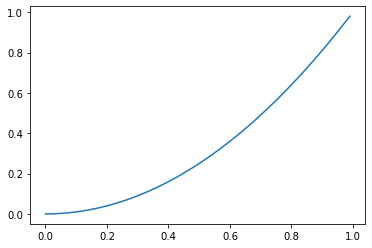

In [18]:
plt.plot(np.arange(0,1,0.01), np.arange(0,1,0.01)**2)

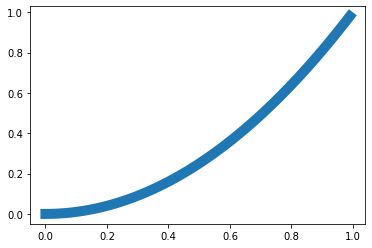

In [19]:
mpl.rcParams['lines.linewidth'] = 10
plt.plot(np.arange(0,1,0.01), np.arange(0,1,0.01)**2)

In [21]:
import seaborn as sns

First we are going to see a preset for all the rcParams by Seaborn, such presets can be found by different packages.

In [24]:
sns.set()

In [26]:
print(mpl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: white
axes.facecolor: #EAEAF2
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: 12.0
axes.labelweight: normal
axes.linewidth: 1.25
axes.prop_cycle: cycler('color', [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.321568627450

In [12]:
#Seaborn has some example data sets, we should use these now:
tips = sns.load_dataset("tips")
print(type(tips))
print(tips)

<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


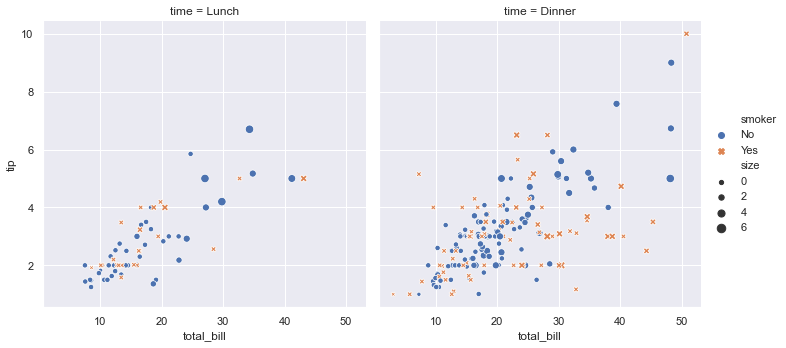

In [27]:
fig = sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue='smoker', style='smoker', size='size')
#print(type(fig))
#print(dir(fig))